In [25]:
#Project 1 ---> Document classification through Count Vectorizer
#It is process of whole machine learning ---> we will use count vectorizer to feature extract the text encoding each document into numbers and then we wil perform prediction using naive bayes (multi nominal)
#desired libraries
#basic numerical computing libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
#wordnet module
from nltk.corpus import wordnet
#stop words module
from nltk.corpus import stopwords
#not necessary to download packages as we did it once before
#tokenization
from nltk import word_tokenize
#stemming and lemmatization
from nltk.stem import PorterStemmer,WordNetLemmatizer
#download (POS) tagger based on the averaged perceptron algorithm package
nltk.download('averaged_perceptron_tagger')
import pickle


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**BBC Text Classification**

In [5]:
#import data
#better download it as csv from the lazy programmer website and import it locally
raw_data = pd.read_csv('../data/interim/bbc_text_cls.csv')
df = raw_data.copy()
df.sample(5)

,text,labels
164,Consumer spending lifts US growth\n\nUS econom...,business
67,India seeks to boost construction\n\nIndia has...,business
516,Levy tipped for Whitbread prize\n\nNovelist An...,entertainment
14,Air passengers win new EU rights\n\nAir passen...,business
1036,Howard denies split over ID cards\n\nMichael H...,politics


In [6]:
#cleansing
#investing
df.shape

(2225, 2)

In [7]:
df.describe().T

,count,unique,top,freq
text,2225,2127,Ray DVD beats box office takings\n\nOscar-nomi...,2
labels,2225,5,sport,511


In [8]:
df.dtypes

text      object
labels    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [10]:
#check duplicates
df.duplicated().sum()

98

In [11]:
#remove duplicates
df.drop_duplicates(inplace=True)
#reset index
#we use drop = true so that we drop index column after reseting
df.reset_index(drop=True, inplace=True)

In [12]:
#investing agian
#.info() is more generalize
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2127 non-null   object
 1   labels  2127 non-null   object
dtypes: object(2)
memory usage: 33.4+ KB


In [13]:
#check missing value
#there is no missing value
df.isna().sum()

text      0
labels    0
dtype: int64

In [14]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['text', 'labels'], dtype='object')

In [15]:
#check object features
#no object features exist
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for text : 
 text
Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and

In [16]:
#inputs and lables
inputs = df['text']
labels = df['labels']

**EDA**

<Axes: >

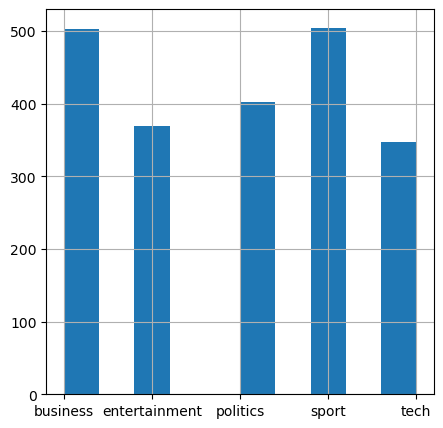

In [17]:
#little bit EDA
#apply histogram on labels which is our output and apply figure size
#matplotlib.pyplot as plt is the library
#we see if we have inbalanced classes at the same time
#checking imbalancing classes always befire splitting
labels.hist(figsize=(5,5))

**Train and Test Split**

In [18]:
#split data
#apply feature extraction of text after split not like classical machine learning 
#name it here inputs so we can name it later x train and x test with count vectorizer
#with count vectorizer we use inputs only as it is feature extraction adn encoding at the same time
inputs_train , inputs_test , y_train , y_test = train_test_split(inputs , labels , random_state=42)

In [19]:
inputs_train

394     Monsanto fined $1.5m for bribery\n\nThe US agr...
952     Tory backing for ID cards\n\nThe Tories are to...
39      Umbro profits lifted by Euro 2004\n\nUK sports...
462     IMF agrees fresh Turkey funding\n\nTurkey has ...
555     Horror film heads US box office\n\nA low-budge...
                              ...                        
1638    A November to remember\n\nLast Saturday, one n...
1095    Terror detainees win Lords appeal\n\nDetaining...
1130    Labour seeks to quell feud talk\n\nLabour's le...
1294    Chepkemei hit by big ban\n\nKenya's athletics ...
860     Jackson film 'absolute disaster'\n\nA PR exper...
Name: text, Length: 1595, dtype: object

In [20]:
inputs_test

282     EU 'too slow' on economic reforms\n\nMost EU c...
1999    BBC web search aids odd queries\n\nThe BBC's o...
1709    Serena becomes world number two\n\nSerena Will...
988     Boothroyd calls for Lords speaker\n\nBetty Boo...
2018    Fast lifts rise into record books\n\nTwo high-...
                              ...                        
746     Brit awards for Devon music acts\n\nDevon sing...
1717    What now for British tennis?\n\nTim Henman's d...
1782    Microsoft seeking spyware trojan\n\nMicrosoft ...
123     Bargain calls widen Softbank loss\n\nJapanese ...
1779    Roddick to face Saulnier in final\n\nAndy Rodd...
Name: text, Length: 532, dtype: object

In [21]:
y_train

394          business
952          politics
39           business
462          business
555     entertainment
            ...      
1638            sport
1095         politics
1130         politics
1294            sport
860     entertainment
Name: labels, Length: 1595, dtype: object

In [22]:
y_test

282          business
1999             tech
1709            sport
988          politics
2018             tech
            ...      
746     entertainment
1717            sport
1782             tech
123          business
1779            sport
Name: labels, Length: 532, dtype: object

**Bags of Words**

**Modeling using Naivee Bayes**

In [23]:
#lets apply second varaition  working after lemmatization 
#to figure out POS tagging then converting it to wordnet pos tagging we can use nltk 
#remeber wordnet POS is different from nltk pos so we need to figure out nltk pos first and then decode it to wordnet to apply lemmatization properly
#create lemmatizer object (instance)
lemm = WordNetLemmatizer()
#make stop words list globally not locally inside function
stopwords = stopwords.words('english')

def nltk_lemm(text,is_lower_case = False):
  
    #tokenization using nltk
    tokens=nltk.word_tokenize(text)
    #apply stop words removal
    #remove any white blank for every elemnt for list of words using list comprehensive
    tokens=[i.strip() for i in tokens]
    #text maybe small or capital
    if is_lower_case :
      new_tokens = [i for i in  tokens if i not in stopwords]
    else :
      new_tokens = [i for i in tokens if i.lower() not in stopwords]
    pos_tags=[]
    for token in new_tokens :
        #nltk pos tags input must be list or string
        pos_tags.append((nltk.pos_tag([token])[0][0],nltk.pos_tag([token])[0][1]))
        
    #second apply mapping function
    pos_map = {
        'NN': wordnet.NOUN,
        'VB': wordnet.VERB,
        'JJ': wordnet.ADJ,
        'RB': wordnet.ADV,
        'DT': wordnet.NOUN
    }
    
    def convert_pos_tag(pos_tag):
      #we decode depends on the first two letters
      #we use .get because it is dictionary
      #wordnet.NOUN is just exception case we donot find any case
      return pos_map.get(pos_tag[:2],wordnet.NOUN)
    
    nltk_lemma=[]
    for tup in pos_tags :
      nltk_lemma.append(lemm.lemmatize(f'{tup[0]}',pos=convert_pos_tag(tup[1])))
    #return filtered tokens converting list to string
    filtered_tokens=' '.join(nltk_lemma)
    return filtered_tokens


  
#loop and get the pos decoding
#in ntlk pos
print('Lemmatize after nltk pos : ')
print()
inputs_train = inputs_train.apply(nltk_lemm)
inputs_test = inputs_test.apply(nltk_lemm)
   
#create count vectorizer instance
vecotorizer = CountVectorizer()
#apply it on train set and test set
x_train = vecotorizer.fit_transform(inputs_train)
x_test = vecotorizer.transform(inputs_test)
#secong case use model and see scores with removing stop words
#create naive bayes object
model = MultinomialNB()
#train model on train data set
model.fit(x_train,y_train)
#measure score of the data set trained and tested assumed we have applied prediction using .predict
print('Train score : ',model.score(x_train,y_train) * 100,'%')
print('Test score : ',model.score(x_test,y_test) * 100,'%')
print('x_train size is : ',x_train)


Lemmatize after nltk pos : 

Train score :  99.37304075235109 %
Test score :  97.36842105263158 %
x_train size is :    (0, 13526)	10
  (0, 8154)	1
  (0, 939)	2
  (0, 3617)	1
  (0, 21028)	3
  (0, 1668)	1
  (0, 8957)	1
  (0, 1660)	3
  (0, 15002)	4
  (0, 1098)	1
  (0, 1)	3
  (0, 8174)	1
  (0, 3619)	1
  (0, 10605)	2
  (0, 14356)	6
  (0, 1524)	2
  (0, 14429)	1
  (0, 7283)	2
  (0, 14776)	1
  (0, 17906)	2
  (0, 20559)	1
  (0, 22059)	2
  (0, 1654)	1
  (0, 3126)	1
  (0, 2559)	1
  :	:
  (1594, 12774)	1
  (1594, 19286)	1
  (1594, 1417)	1
  (1594, 5486)	1
  (1594, 18521)	1
  (1594, 7888)	1
  (1594, 16683)	1
  (1594, 18506)	1
  (1594, 18130)	1
  (1594, 16295)	3
  (1594, 17543)	1
  (1594, 16171)	1
  (1594, 18004)	1
  (1594, 7753)	1
  (1594, 2047)	1
  (1594, 15453)	1
  (1594, 13482)	1
  (1594, 11638)	9
  (1594, 2824)	3
  (1594, 21712)	1
  (1594, 17664)	1
  (1594, 12023)	1
  (1594, 8504)	1
  (1594, 5390)	1
  (1594, 18546)	1


**Saving Model**

In [24]:
#save model for Count Vectorizer and another one for Multinominal Naive Bayes and reuse it again
#we can use bag of words or TFIDF they gave the same result
import pickle
pickle.dump(vecotorizer, open('model_cv.pkl', 'wb'))
pickle.dump(model, open('model_mnnb.pkl', 'wb'))